In [1]:
#%matplotlib notebook
import json
import requests
#from config import api_key
import matplotlib.pyplot as plt
import datetime
from time import strptime
import numpy as np
import pandas as pd
import os
import csv
import re

In [2]:
cryptodatafile = 'merged_crypto_data.csv'
RawCrypto_df = pd.read_csv(cryptodatafile)

RawCrypto_df['Coin'].unique()


array(['bitcoin', 'bitcoin-cash', 'bitconnect', 'dash', 'ethereum',
       'ethereum-classic', 'iota', 'litecoin', 'monero', 'nem', 'neo',
       'qtum', 'stratis', 'waves'], dtype=object)

In [3]:
def monthToNum(shortMonth):
    return {
            'jan' : 1,
            'feb' : 2,
            'mar' : 3,
            'apr' : 4,
            'may' : 5,
            'jun' : 6,
            'jul' : 7,
            'aug' : 8,
            'sep' : 9, 
            'oct' : 10,
            'nov' : 11,
            'dec' : 12
    }[shortMonth]

splitdate = pd.DataFrame()
splitdate[['month','day','year']] = RawCrypto_df['Date'].str.split("\s|,", 2, expand=True)
splitdate['month'] = splitdate['month'].str.lower()
splitdate['month'] = splitdate['month'].apply(monthToNum)
# splitdate['M'] = monthToNum(splitdate['M'])
splitdate

,month,day,year
0,2,28,2021
1,2,27,2021
2,2,26,2021
3,2,25,2021
4,2,24,2021
...,...,...,...
26277,6,07,2016
26278,6,06,2016
26279,6,05,2016
26280,6,04,2016


In [4]:
RawCrypto_df.insert(1,'Datestamp',pd.to_datetime(splitdate[['year','month','day']]))
RawCrypto_df

,Coin,Datestamp,Date,Open,High,Low,Close,Volume,Market Cap
0,bitcoin,2021-02-28,"Feb 28, 2021",46194.02,46716.43,43241.62,45137.77,5.344389e+10,"$841,428,977,515"
1,bitcoin,2021-02-27,"Feb 27, 2021",46344.77,48253.27,45269.03,46188.45,4.591095e+10,"$860,978,135,421"
2,bitcoin,2021-02-26,"Feb 26, 2021",47180.46,48370.79,44454.84,46339.76,3.509680e+11,"$863,752,275,053"
3,bitcoin,2021-02-25,"Feb 25, 2021",49709.08,51948.97,47093.85,47093.85,5.450657e+10,"$877,766,126,138"
4,bitcoin,2021-02-24,"Feb 24, 2021",48835.09,51290.14,47213.50,49705.33,6.369552e+10,"$926,393,090,751"
...,...,...,...,...,...,...,...,...,...
26277,waves,2016-06-07,"Jun 07, 2016",0.77,1.08,0.77,0.84,4.593200e+04,$0
26278,waves,2016-06-06,"Jun 06, 2016",0.71,1.17,0.71,0.77,9.557300e+04,$0
26279,waves,2016-06-05,"Jun 05, 2016",0.59,1.11,0.58,0.71,4.170000e+04,$0
26280,waves,2016-06-04,"Jun 04, 2016",1.09,1.29,0.58,0.59,4.912000e+03,$0


In [ ]:
ethereum_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'ethereum'].sort_values(by='Datestamp')
litecoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'litecoin'].sort_values(by='Datestamp')
bitcoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'bitcoin'].sort_values(by='Datestamp')
iota_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'iota'].sort_values(by='Datestamp')
monero_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'monero'].sort_values(by='Datestamp')
dash_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'dash'].sort_values(by='Datestamp')



In [ ]:
bitcoin_df.plot('Date','Close')

In [ ]:
bitcoin_groupbymonth_df = bitcoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M'))
plt.plot(bitcoin_groupbymonth_df[['High']].std())
plt.title('Standard Deviation of Monthly High/Low prices')

In [ ]:
plt.plot(bitcoin_groupbymonth_df[['Low',]].min())
plt.plot(bitcoin_groupbymonth_df[['High']].max())
plt.title('Lowest and Highest Prices By Month')
plt.show()

In [5]:
delta = ethereum_groupbymonth_df['High'].max()
delta = pd.DataFrame(delta)
delta['Low'] = ethereum_groupbymonth_df['Low'].min()
delta['Delta'] = delta['High'] - delta['Low']
plt.plot(delta['High'], color = 'red')
plt.plot(delta['Low'], color = 'red')
delta['x1'] = delta.index
plt.fill_between(x=delta['x1'], y1=delta['Low'], y2=delta['High'], color = 'red')
plt.title("Difference between a month's Highest and Lowest price")


NameError: name 'ethereum_groupbymonth_df' is not defined

In [ ]:
delta

In [6]:
#['bitcoin','ethereum','litecoin','iota','monero','dash']
coinlist = ['bitcoin','ethereum','litecoin','iota','monero','dash']
tier1_coinlist = ['bitcoin']
tier2_coinlist = ['ethereum','litecoin']
tier3_coinlist = ['iota','dash','monero','waves','stratis']

In [9]:
# draft loop
# create [var]coin_df
# group by month
# create plots 

for coin in coinlist:
    # create multiple dataframes for coins, sort by date 
    globals()[f"{coin}_df"] = RawCrypto_df.loc[RawCrypto_df['Coin'] == coin].sort_values(by='Datestamp')
    # create mutliple groupby tables 
    exec(f"{coin}_groupbymonth_df = {coin}_df.groupby(pd.Grouper(key='Datestamp',freq='1M'))")



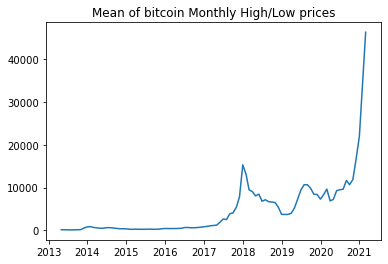

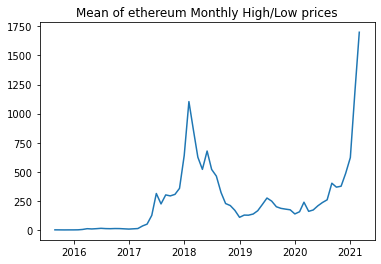

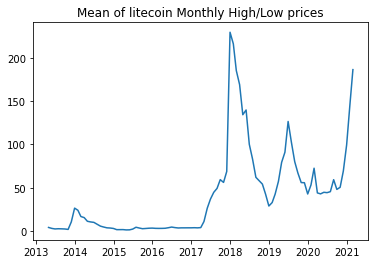

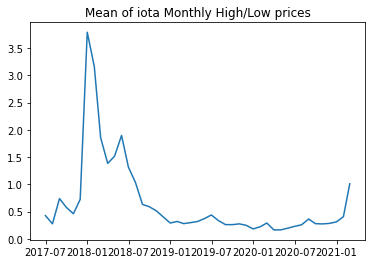

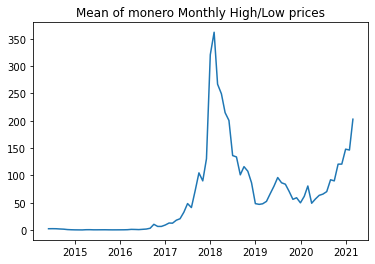

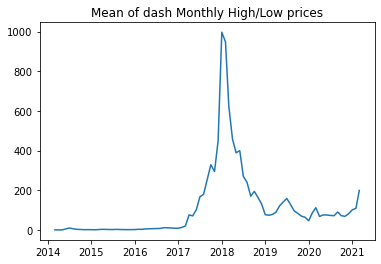

In [22]:
for coin in coinlist:
    plt.figure()
    exec(f"plt.plot({coin}_groupbymonth_df[['Close']].mean())")
    exec(f"plt.title('Mean of {coin} Monthly High/Low prices')")    

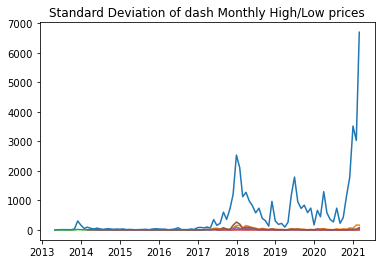

In [8]:
for coin in coinlist:
    exec(f"plt.plot({coin}_groupbymonth_df[['High']].std())")
    exec(f"plt.title('Standard Deviation of {coin} Monthly High/Low prices')")

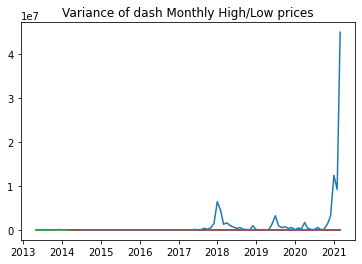

In [10]:
for coin in coinlist:
    exec(f"plt.plot({coin}_groupbymonth_df[['High']].var())")
    exec(f"plt.title('Variance of {coin} Monthly High/Low prices')")  

,High,Low,HighLowDelta,Close,CloseDiff,PctChange,x1
Datestamp,,,,,,,
2013-04-30,147.49,134.00,13.49,144.54,NaN,NaN,2013-04-30
2013-05-31,139.89,79.10,60.79,133.48,-11.06,-7.651861,2013-05-31
2013-06-30,129.78,88.50,41.28,129.30,-4.18,-3.131555,2013-06-30
2013-07-31,111.34,65.53,45.81,107.99,-21.31,-16.481052,2013-07-31
2013-08-31,140.89,101.21,39.68,135.35,27.36,25.335679,2013-08-31
...,...,...,...,...,...,...,...
2020-10-31,14028.21,10416.69,3611.52,13780.99,1810.51,15.124790,2020-10-31
2020-11-30,19749.26,13243.16,6506.10,19625.84,5844.85,42.412410,2020-11-30
2020-12-31,29244.88,17619.53,11625.35,29001.72,9375.88,47.773140,2020-12-31


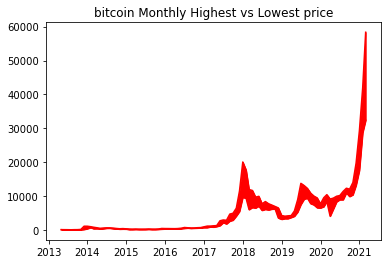

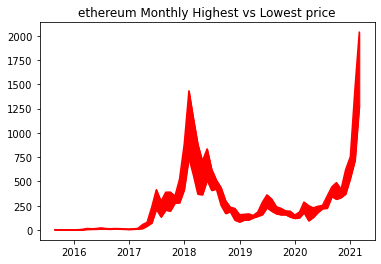

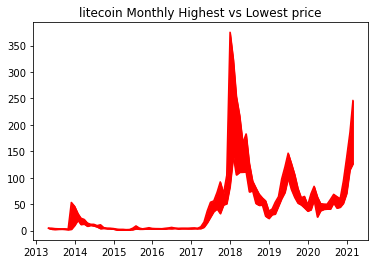

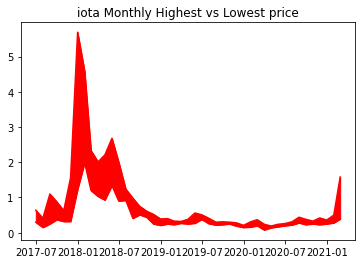

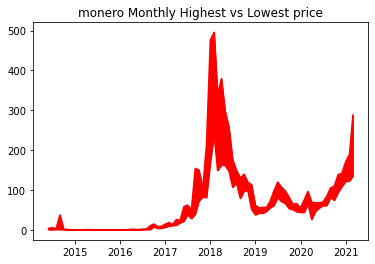

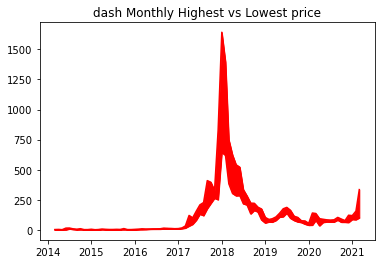

In [11]:
for coin in coinlist:
    exec(f"{coin}_delta = {coin}_groupbymonth_df['High'].max()")
    exec(f"{coin}_delta = pd.DataFrame({coin}_delta)")
    exec(f"{coin}_delta['Low'] = {coin}_groupbymonth_df['Low'].min()")
    exec(f"{coin}_delta['HighLowDelta'] = {coin}_delta['High'] - {coin}_delta['Low']")
    exec(f"{coin}_delta['Close'] = {coin}_groupbymonth_df['Close'].max()")
    exec(f"{coin}_delta['CloseDiff'] = {coin}_delta['Close'].diff()")
    exec(f"{coin}_delta['PctChange'] = ({coin}_delta['CloseDiff']) / ({coin}_delta['Close'] - {coin}_delta['CloseDiff']) * 100 ")    
    plt.figure()
    exec(f"plt.plot({coin}_delta['High'], color = 'red')")
    exec(f"plt.plot({coin}_delta['Low'], color = 'red')")
    exec(f"{coin}_delta['x1'] = {coin}_delta.index")
    exec(f"plt.fill_between(x={coin}_delta['x1'], y1={coin}_delta['Low'], y2={coin}_delta['High'], color = 'red')")
    exec(f"plt.title('{coin} Monthly Highest vs Lowest price')")   

bitcoin_delta

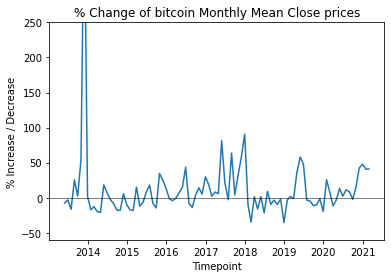

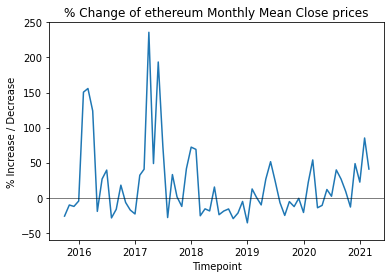

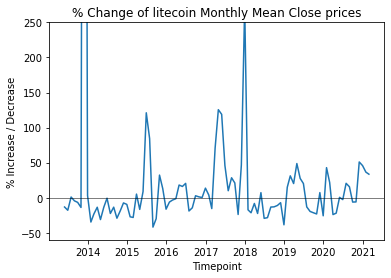

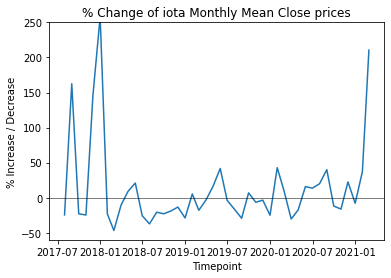

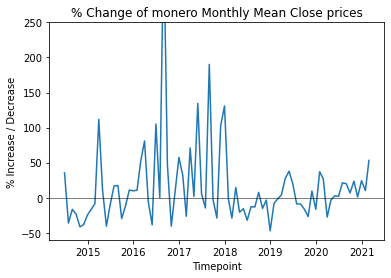

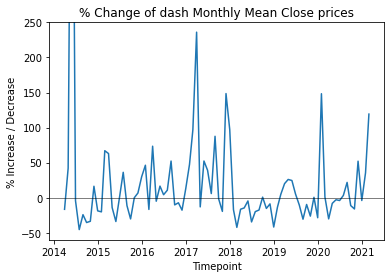

In [20]:
for coin in coinlist:
    plt.figure()
    exec(f"plt.plot({coin}_delta[['PctChange']])")
    exec(f"plt.title('% Change of {coin} Monthly Mean Close prices')")
    plt.xlabel('Timepoint')
    plt.ylabel('% Increase / Decrease')
    plt.ylim(-60,250)
    plt.axhline(y=0, color = 'black', linewidth = .5)